### Build an MLP for ECG Signal Classification (5 classes)  - Keras
This is the implementation of an MLP for classifying the ECG signals. <br>
Your task is to design new DNNs for ECG signal classification <br>
You can use this file as a template

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import pandas as pd

In [42]:
from google.colab import files

uploaded = files.upload()

Saving ECG_dataX.csv to ECG_dataX (1).csv
Saving ECG_dataY.csv to ECG_dataY (1).csv


### Load the data

In [43]:
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')

In [44]:
#convert dataframe to numpy array
X=X.values
X.shape

(3841, 187)

In [45]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [46]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

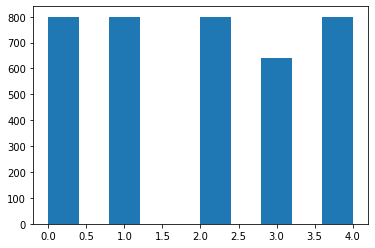

In [47]:
plt.hist(Y)

In [48]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints

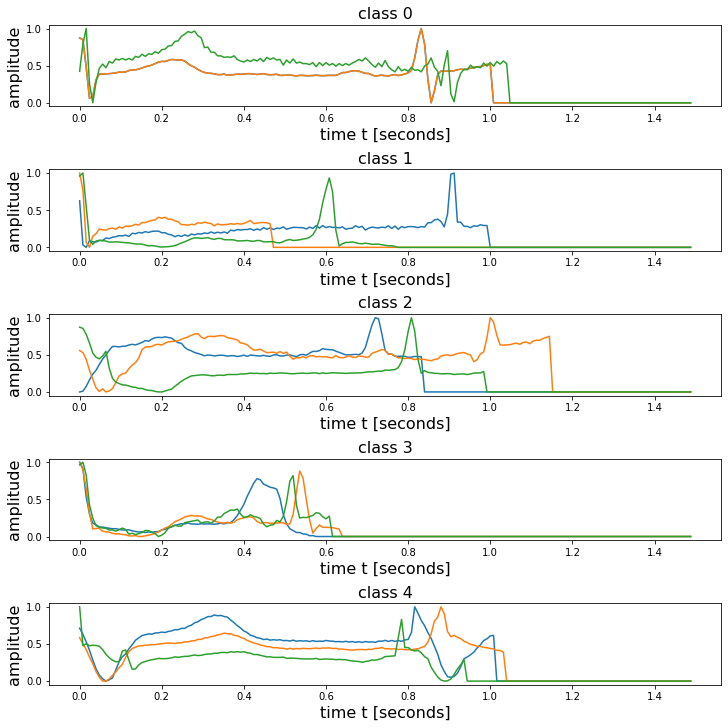

In [51]:
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
#note: add a channel axis to the data if the network is CNN: see the examples presented in class

### Define the MLP model  (Replace this with your network and rename the file)

In [53]:
#model = Sequential()
#model.add(Dense(units=256, activation='relu', input_shape=(187,)))
#model.add(Dense(units=256, activation='relu'))
#model.add(Dense(units=5, activation='softmax'))
#model.compile(loss='sparse_categorical_crossentropy', optimizer=Adamax(lr=0.001), metrics=['accuracy'])
#model.summary()

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import *
from tensorflow.keras.layers import AveragePooling1D
import keras.layers.normalization
from tensorflow.keras.layers import LayerNormalization


inputs = Input(shape=(187,))
linear1=Dense(187, activation='relu')(inputs)

linear2 = Dense(88,activation='relu')(linear1)
reshape1 = Reshape([17,11])(linear1)
avg1 = AveragePooling1D(pool_size=2, strides=2)(reshape1)
reshape11 = Reshape([88])(avg1)
added1 = keras.layers.Add()([linear2, reshape11])

norm_layer1 = LayerNormalization()(added1)
layer3 = Dense(44,activation='relu')(norm_layer1)

reshape2 = Reshape([8,11])(added1)
avg2 = AveragePooling1D(pool_size=2,strides=2)(reshape2)
reshape22 = Reshape([44])(avg2)


added2 = keras.layers.Add()([layer3, reshape22])

norm_layer2 = LayerNormalization()(added2)
layer4 = Dense(22,activation='relu')(norm_layer2)

reshape3 = Reshape([4,11])(added2)
avg3 = AveragePooling1D(pool_size=2,strides=2)(reshape3)
reshape33 = Reshape([22])(avg3)


added3 = keras.layers.Add()([layer4, reshape33])

norm_layer3 = LayerNormalization()(added3)
layer5 = Dense(187,activation='relu')(norm_layer3)

layer6 = Dense(187,activation='relu')(layer5)

output = keras.layers.Activation('softmax')(layer6)

model = Model(inputs=inputs, outputs=output)



model.compile(loss='sparse_categorical_crossentropy', optimizer=Adamax(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 187)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 187)          35156       ['input_3[0][0]']                
                                                                                                  
 reshape_12 (Reshape)           (None, 17, 11)       0           ['dense_12[0][0]']               
                                                                                                  
 average_pooling1d_6 (AveragePo  (None, 8, 11)       0           ['reshape_12[0][0]']             
 oling1D)                                                                                   

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [54]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]
epoch_save=-1

### Train the model

In [55]:
epoch = 0
for epoch in range(epoch_save+1, 111): #change 100 to a larger number if necessary
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(X_train, Y_train, batch_size=64, epochs=1, validation_data=(X_val, Y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a a HDF5 file 
    model.save('ECG_Keras_sCE_e'+str(epoch)+'.h5')

epoch 0
44/44 [==============================] - 2s 16ms/step - loss: 4.1533 - accuracy: 0.3802 - val_loss: 2.9111 - val_accuracy: 0.4513
epoch 1
44/44 [==============================] - 0s 10ms/step - loss: 1.8000 - accuracy: 0.5803 - val_loss: 1.0721 - val_accuracy: 0.6201
epoch 2
44/44 [==============================] - 0s 9ms/step - loss: 0.8579 - accuracy: 0.7185 - val_loss: 0.8481 - val_accuracy: 0.7175
epoch 3
44/44 [==============================] - 0s 10ms/step - loss: 0.6812 - accuracy: 0.7666 - val_loss: 0.7128 - val_accuracy: 0.7240
epoch 4
44/44 [==============================] - 0s 9ms/step - loss: 0.5894 - accuracy: 0.7894 - val_loss: 0.6486 - val_accuracy: 0.7565
epoch 5
44/44 [==============================] - 0s 9ms/step - loss: 0.5205 - accuracy: 0.8169 - val_loss: 0.5971 - val_accuracy: 0.7857
epoch 6
44/44 [==============================] - 0s 9ms/step - loss: 0.4682 - accuracy: 0.8368 - val_loss: 0.5527 - val_accuracy: 0.8019
epoch 7
44/44 [=======================

### Plot training loss vs epoch and validation loss vs epoch

In [56]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

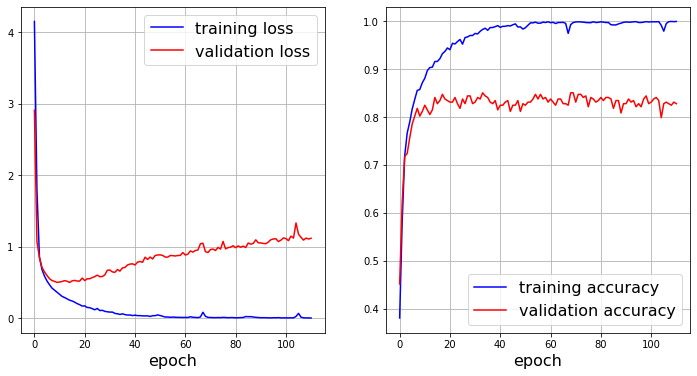

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

### Test the model

In [58]:
#load the best model
best_epoch=np.argmax(acc_val_list)
best_epoch

33

In [59]:
import tensorflow
model = tensorflow.keras.models.load_model("ECG_Keras_sCE_e"+str(best_epoch)+".h5")

In [60]:
score = model.evaluate(X_test, Y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.46806207299232483
Test accuracy: 0.868660569190979


### Make Prediction on the test set

In [61]:
Y_test_pred=model.predict(X_test, batch_size=64)

13/13 [==============================] - 0s 5ms/step


In [62]:
Y_test_pred[0]

array([4.7674945e-05, 9.9992424e-01, 4.4152389e-06, 1.3405490e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.7185599e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e-07,
       1.2972555e-07, 1.2972555e-07, 1.2972555e-07, 1.2972555e

In [63]:
np.argmax(Y_test_pred[0])

1

In [64]:
Y_test[0]

1

In [65]:
Y_test_pred=np.argmax(Y_test_pred, axis=1)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       176
           1       0.86      0.85      0.85       154
           2       0.87      0.88      0.87       146
           3       0.89      0.90      0.89       122
           4       0.94      0.92      0.93       171

    accuracy                           0.87       769
   macro avg       0.87      0.87      0.87       769
weighted avg       0.87      0.87      0.87       769

